In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
'''from google.colab import files

uploaded = files.upload()'''

'from google.colab import files\n\nuploaded = files.upload()'

In [8]:
df = pd.read_csv('/content/drive/MyDrive/CSV_Files/spotdata.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [10]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [11]:
df.tail()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


In [12]:
newdf = df.drop(columns = ['song_title','speechiness','instrumentalness','target','tempo','valence','time_signature','artist'])

In [13]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2017 non-null   int64  
 1   acousticness  2017 non-null   float64
 2   danceability  2017 non-null   float64
 3   duration_ms   2017 non-null   int64  
 4   energy        2017 non-null   float64
 5   key           2017 non-null   int64  
 6   liveness      2017 non-null   float64
 7   loudness      2017 non-null   float64
 8   mode          2017 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 141.9 KB


In [14]:
newdf.isnull().sum()

,0
Unnamed: 0,0
acousticness,0
danceability,0
duration_ms,0
energy,0
key,0
liveness,0
loudness,0
mode,0


In [15]:
correlation_matrix = newdf.corr()

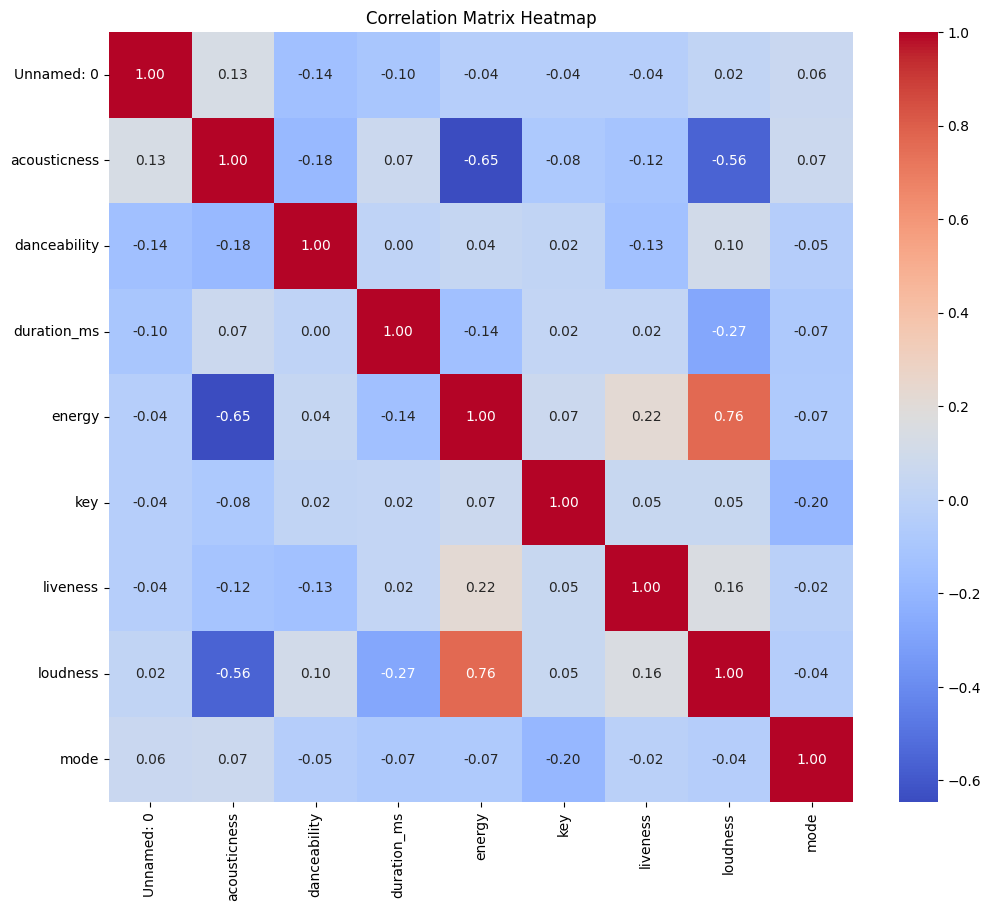

In [16]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

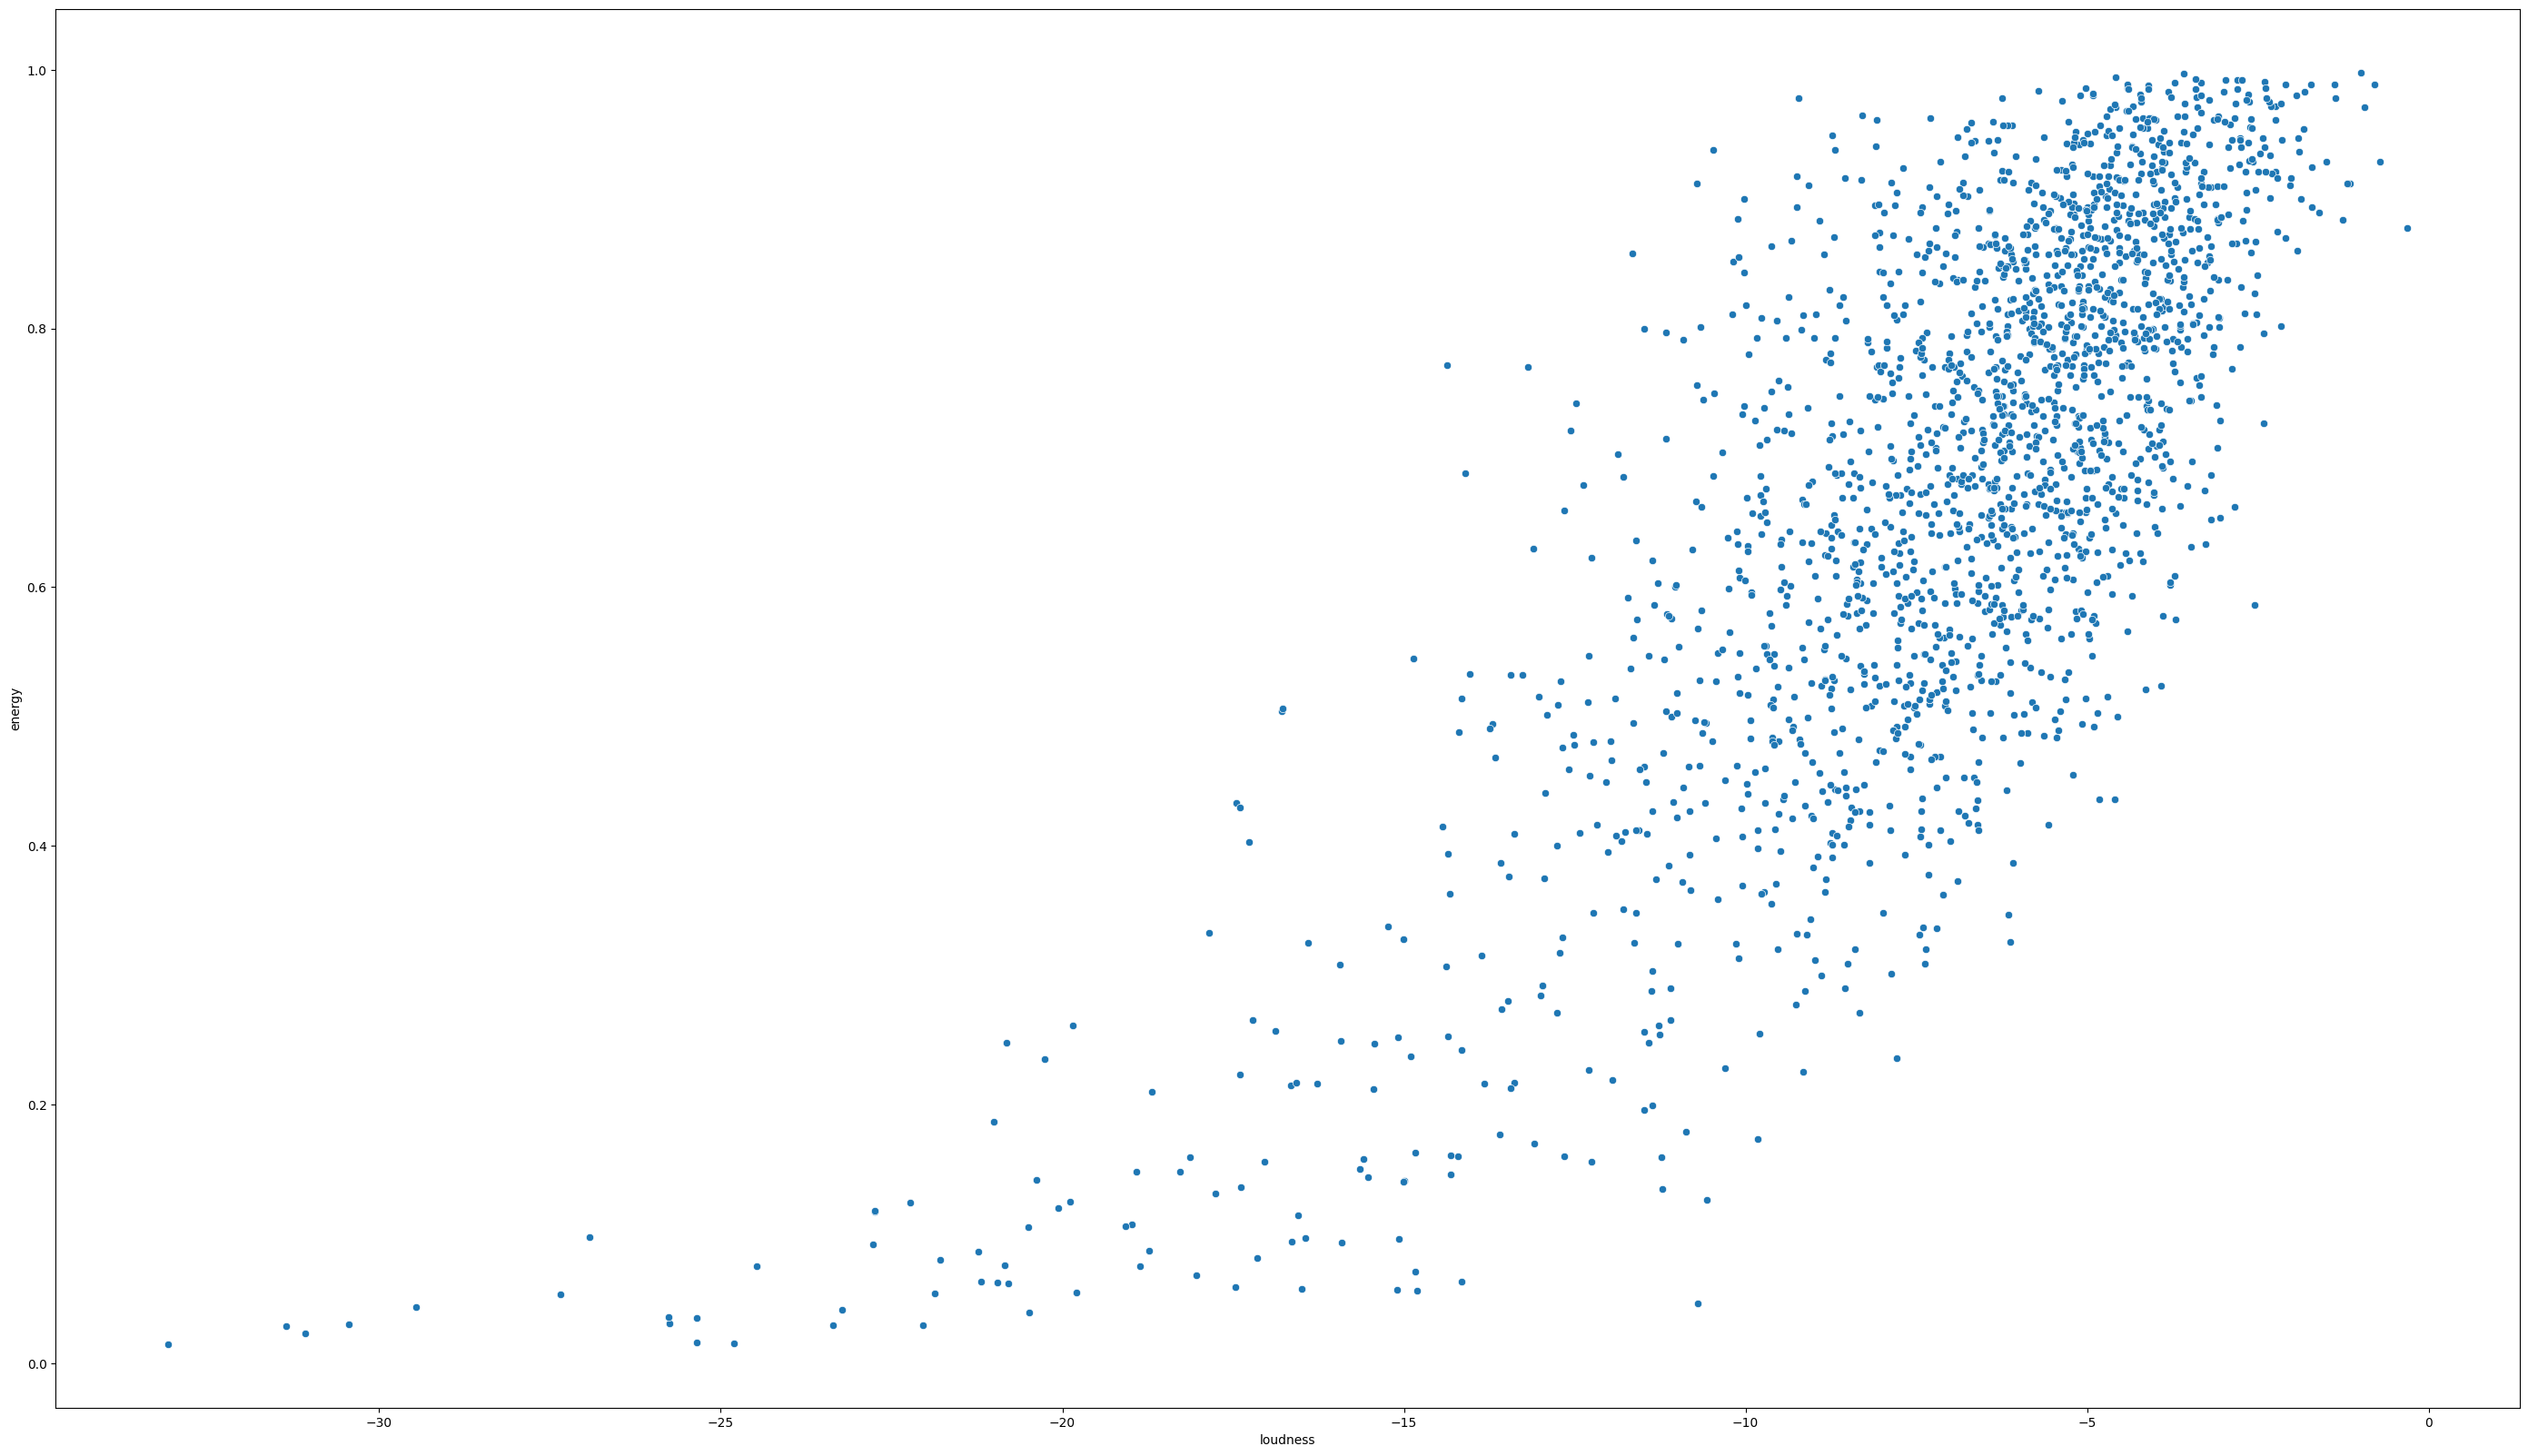

In [17]:
plt.figure(figsize=(35,20))
sns.scatterplot(x='loudness', y='energy',data=newdf)
plt.show()

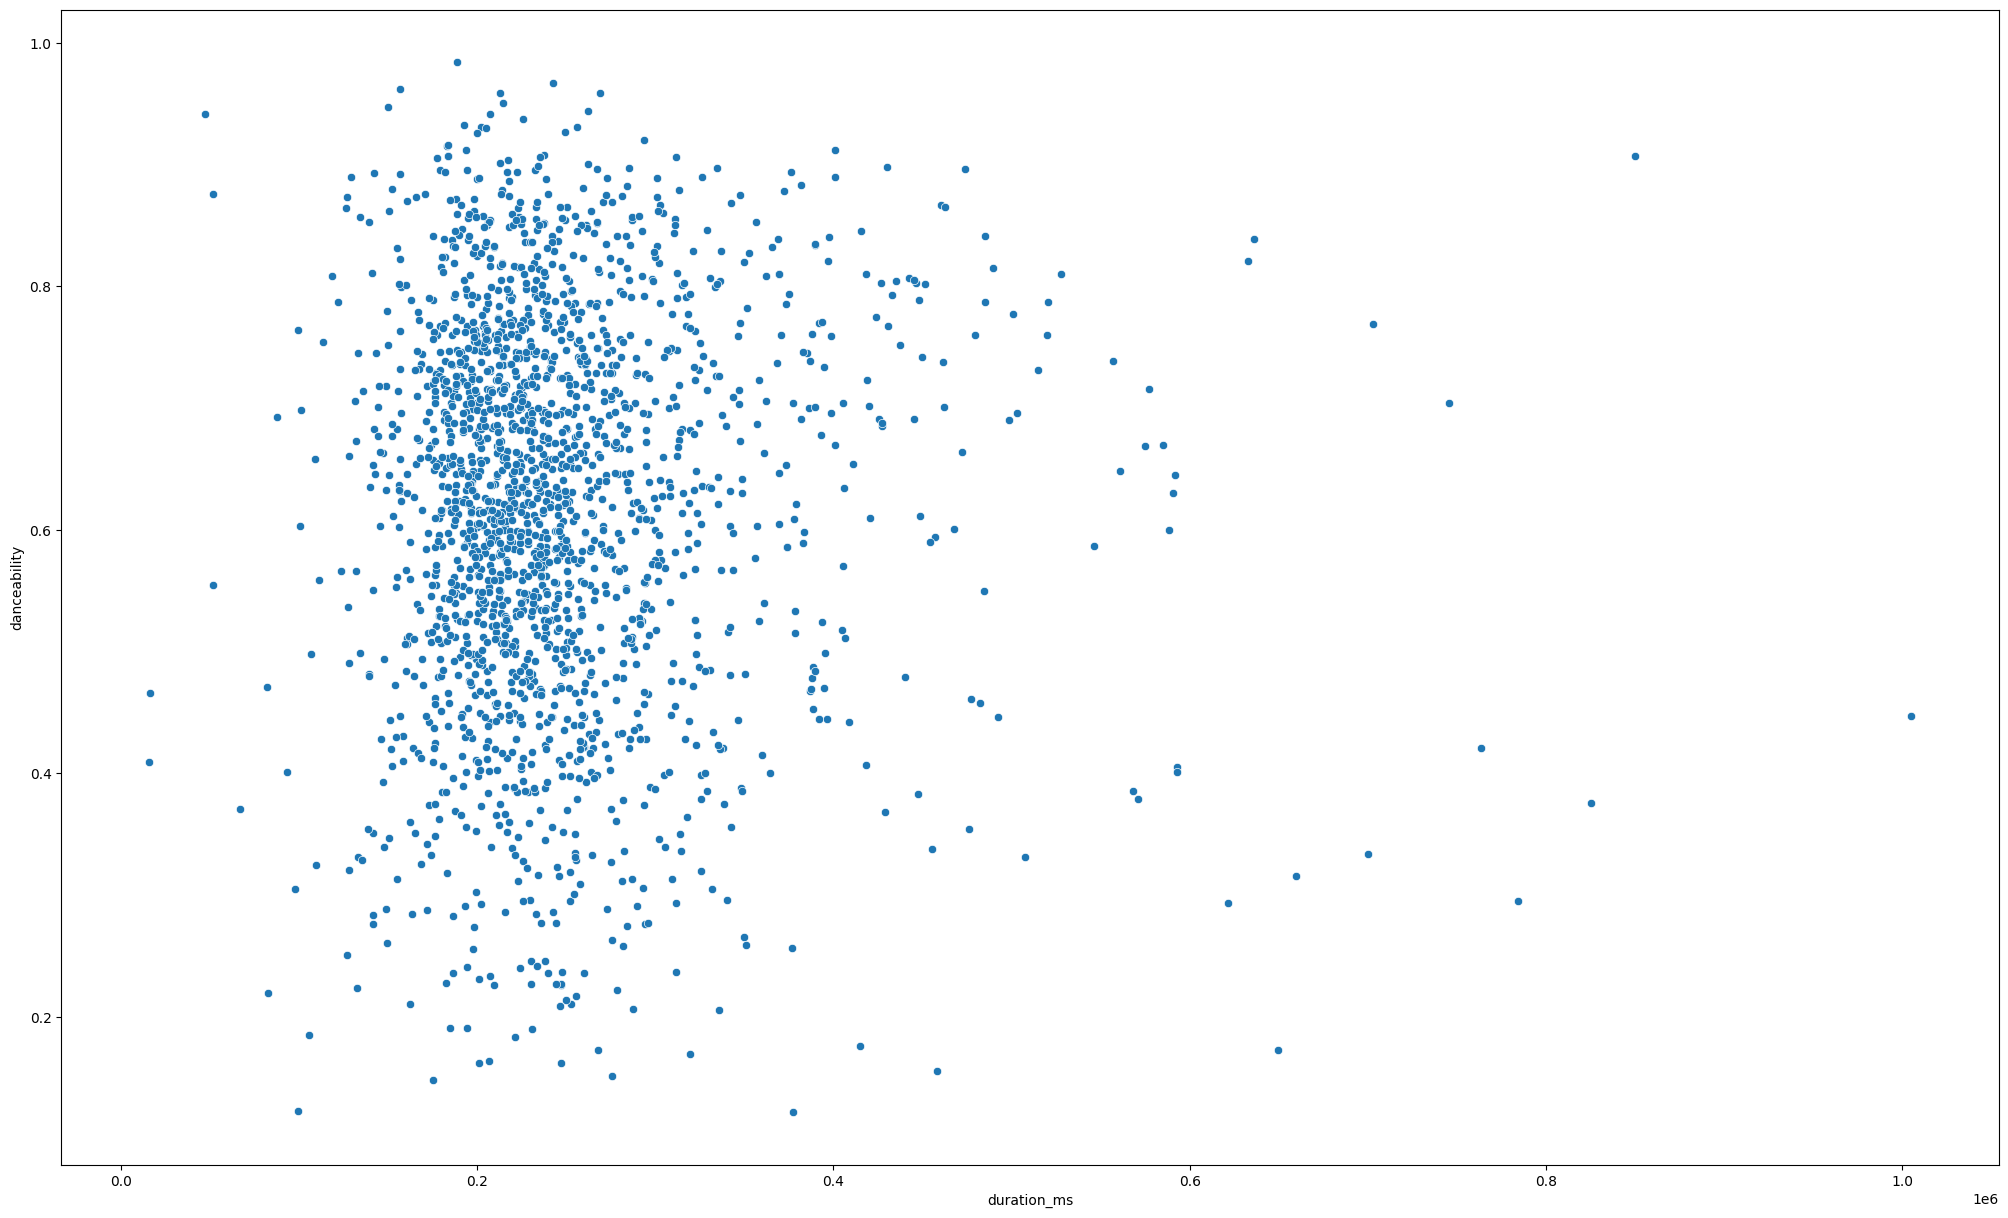

In [18]:
plt.figure(figsize=(25,15))
sns.scatterplot(x='duration_ms', y='danceability',data=newdf)
plt.show()

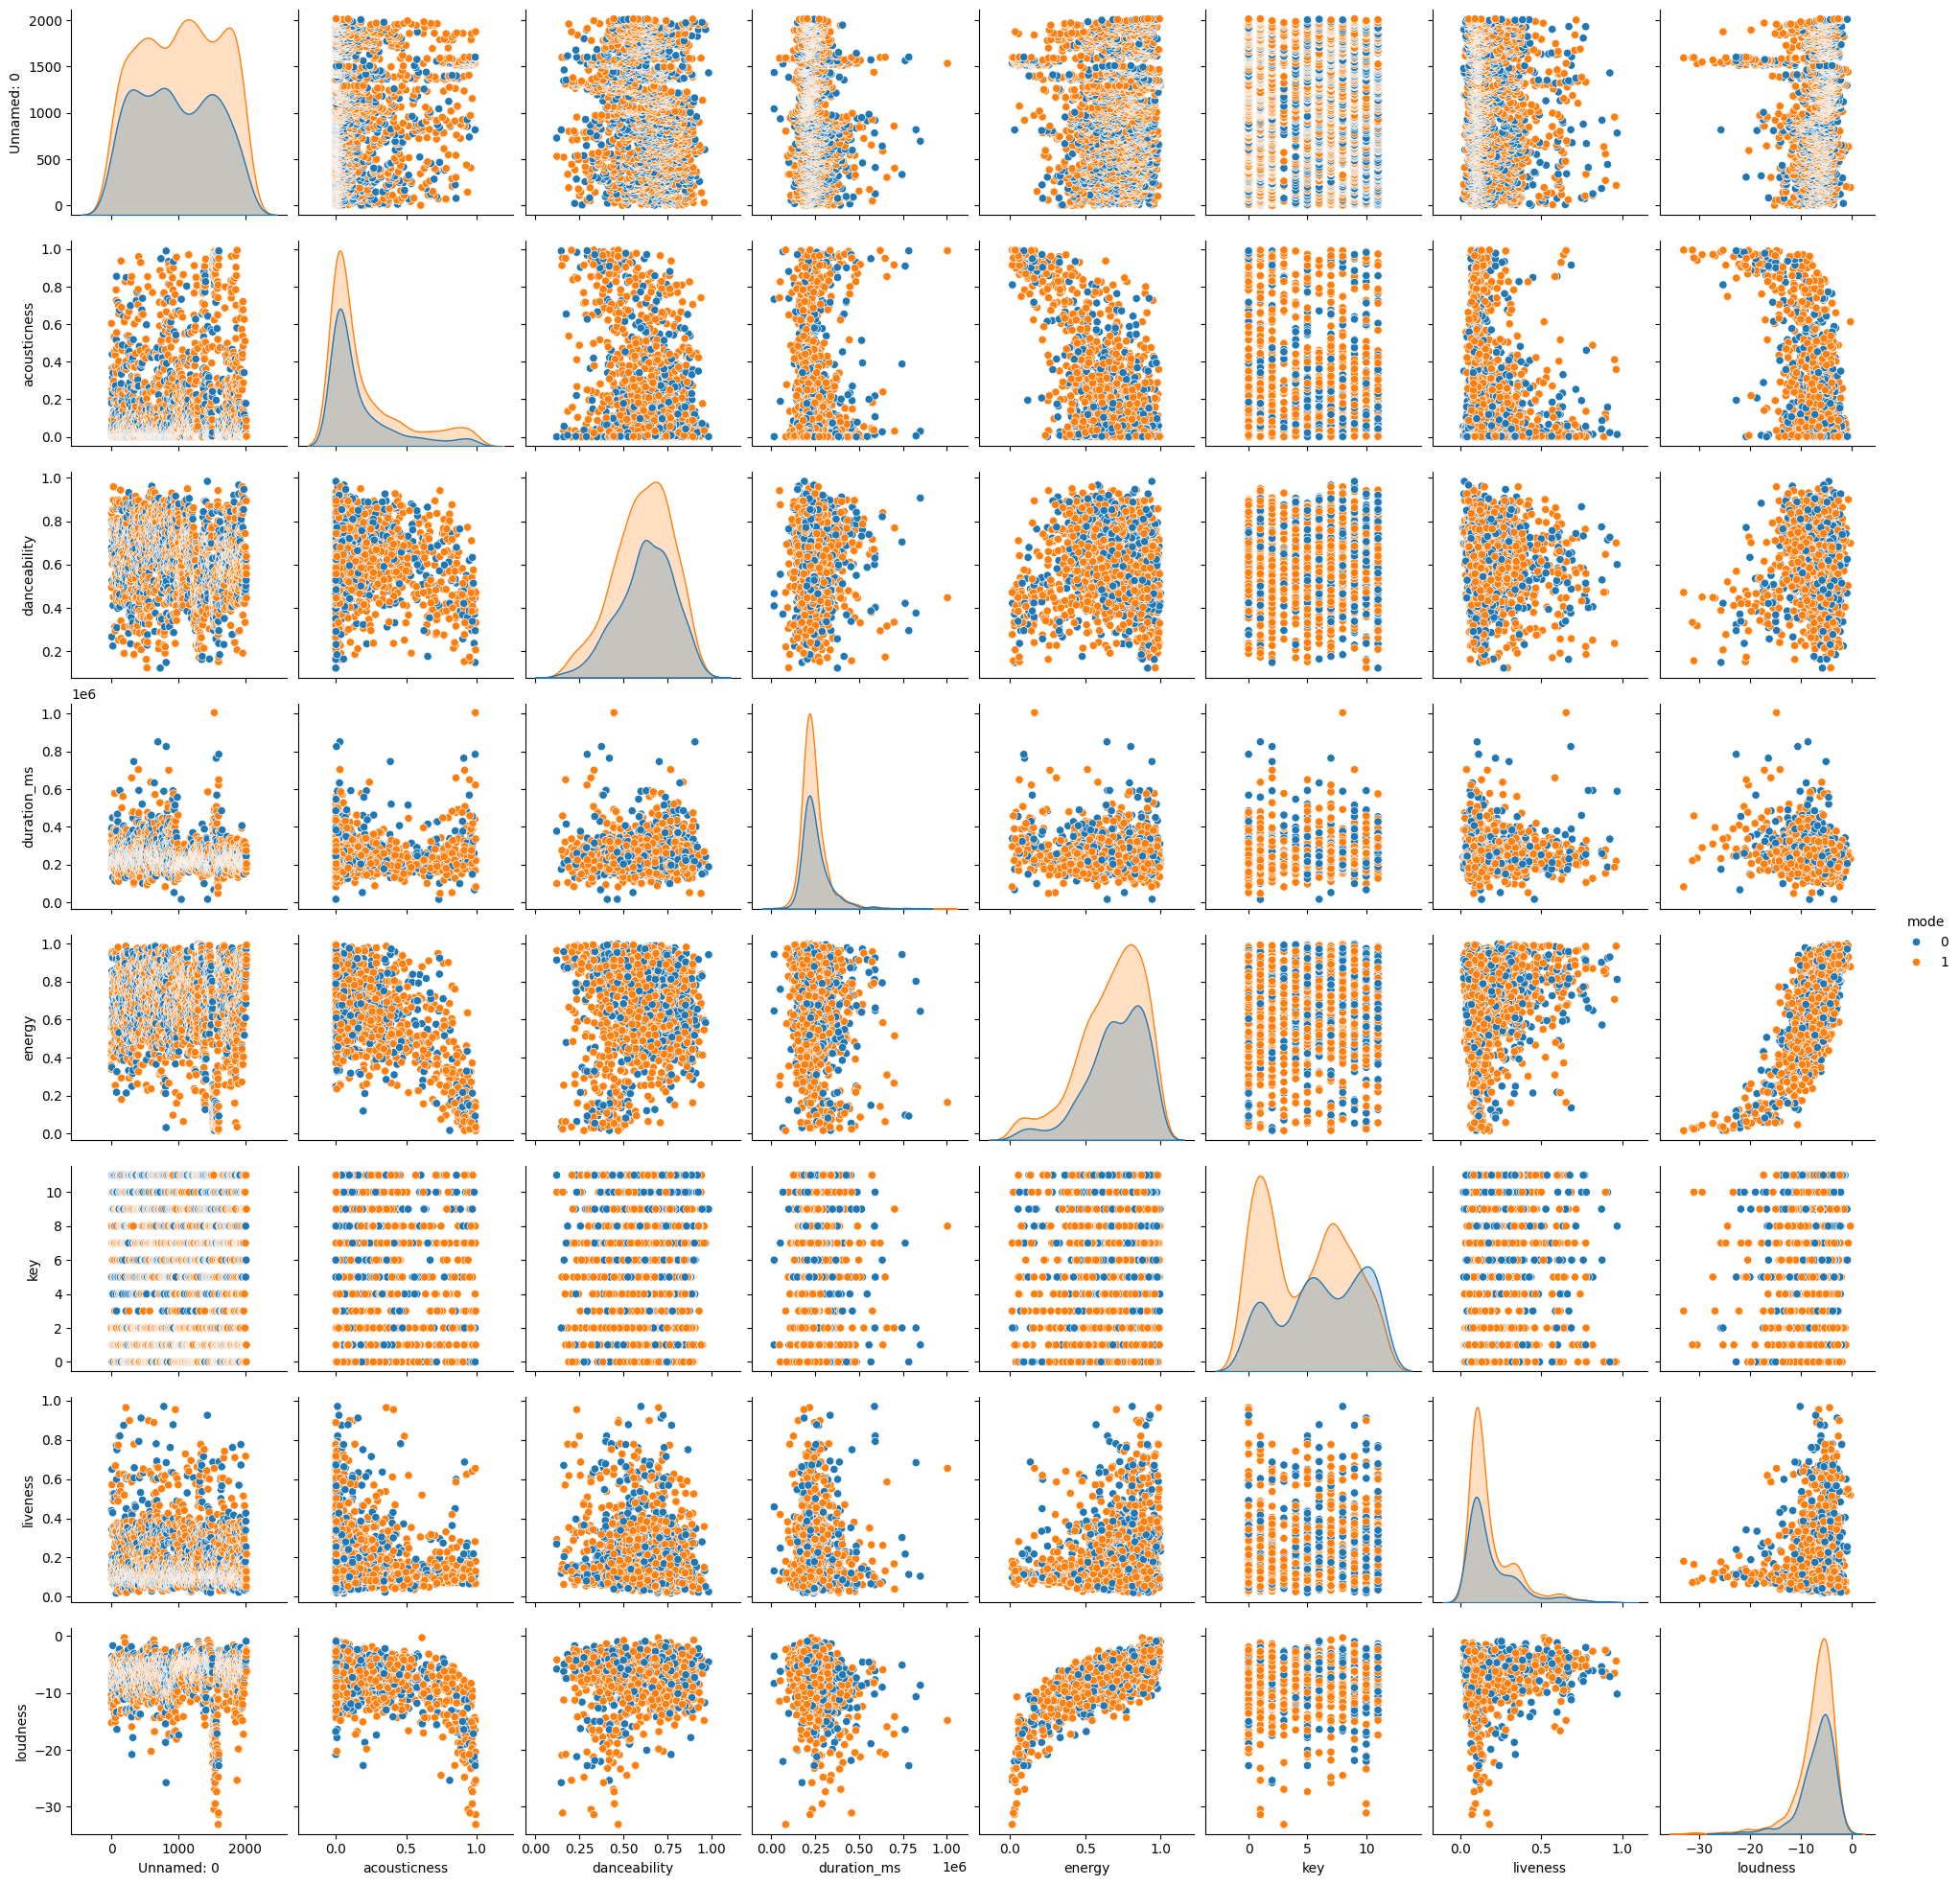

In [19]:
sns.pairplot(newdf, hue = 'mode')

In [20]:
df['artist'].nunique

<bound method IndexOpsMixin.nunique of 0                 Future
1       Childish Gambino
2                 Future
3            Beach House
4            Junior Boys
              ...       
2012      Kill The Noise
2013      Dillon Francis
2014            Rain Man
2015          Twin Moons
2016           Bleachers
Name: artist, Length: 2017, dtype: object>

In [21]:
#List all column names except 'mode'
feature_columns = [col for col in newdf.columns if col != 'mode']

#Choosing mode to be our dependent value
x = newdf.drop('mode',axis=1)
y=newdf['mode']

In [22]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2017 non-null   int64  
 1   acousticness  2017 non-null   float64
 2   danceability  2017 non-null   float64
 3   duration_ms   2017 non-null   int64  
 4   energy        2017 non-null   float64
 5   key           2017 non-null   int64  
 6   liveness      2017 non-null   float64
 7   loudness      2017 non-null   float64
 8   mode          2017 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 141.9 KB


In [23]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(newdf[[ 'acousticness','danceability','duration_ms','energy','key','liveness','loudness']], newdf['mode'], test_size=0.25, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
trainX_scaled = scaler.fit_transform(trainX)

# Only transform the test data (do not fit again)
testX_scaled = scaler.transform(testX)

# Instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(trainX_scaled, trainY)

# Make predictions on the test set
knn_pred = knn.predict(testX_scaled)

accuracy_knn = accuracy_score(testY, knn_pred)

# Report the evaluation metric
print("\nK-Nearest Neighbors Classifier Performance Metric:")
print(f'Accuracy: {accuracy_knn}')


K-Nearest Neighbors Classifier Performance Metric:
Accuracy: 0.592079207920792


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

# Initialize the StandardScaler
scaler = StandardScaler()

trainX_scaled = scaler.fit_transform(trainX)

testX_scaled = scaler.transform(testX)

# Instantiate the classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf.fit(trainX_scaled, trainY)

# Make predictions on the test set
rf_pred = rf.predict(testX_scaled)

# Calculate accuracy by comparing the rounded predictions to the actual labels
accuracy_rf = accuracy_score(testY, rf_pred)

print("\nRandom Forest Regressor Performance Metric:")
print(f'Accuracy: {accuracy_rf}')






Random Forest Regressor Performance Metric:
Accuracy: 0.6475247524752475


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Instantiate the scaler and the classifier
scaler = StandardScaler()
log_reg = LogisticRegression()

# Scale the training and test data
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)

# Train the classifier
log_reg.fit(trainX_scaled, trainY)

# Make predictions on the test set
log_reg_pred = log_reg.predict(testX_scaled)

# Calculate accuracy by comparing the predictions to the actual labels
accuracy_log_reg = accuracy_score(testY, log_reg_pred)

print("\nLogistic Regression Performance Metric:")
print(f"Accuracy: {accuracy_log_reg}")

print("Predictions (0s and 1s):")
print(log_reg_pred)



Logistic Regression Performance Metric:
Accuracy: 0.6277227722772277
Predictions (0s and 1s):
[1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 